In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\GabrielMedina\Desktop\Gitizin\carrinho_abandonado_csv.csv')
pd.options.display.max_columns = 103
display(df.head())

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,status,channel,isSubscription,reserva,aliasId,name,cidade,bairro,rua,CEP,Id_parceiro,parceiro1,parceiro2,criacao,entrada,saida,guest_name,guest_surname,guest_email,cost_total,cost_gross,cost_net,cupom_name,cupom_tipo,cupom_amount,sellerPerson,criacao2
0,0,0,0,0,0,0,RESERVED,APP,True,AE45H,WA04F,SP-HOBC 0307 - Housi Duplex,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:38:47.525Z,2021-12-20,2022-01-20,Rogério,Gomes,rogerioslgomes@gmail.com,9925.90,992590.0,619948.0,NaN,NaN,NaN,NaN,2021-11-18
1,1,1,1,1,1,1,RESERVED,COCKPIT,True,ZA117G,BK28G,SP-VNHM 1213A - Housi Prime,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:38:14.892Z,2021-11-20,2021-12-20,Mirian,Moraes,mirian30moraes@hotmail.com,3221.67,339123.0,207123.0,housiback120,percent,5,Bianca Magalhaes,2021-11-18
2,2,2,2,2,2,2,RESERVED,SITE,True,ZD43G,LY32F,SP-VNQT 1408 - Housi Duplex,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:37:13.589Z,2021-11-23,2021-12-23,Adriano,Artiaga,adrianoartiaga@uol.com.br,7895.47,789547.0,593745.0,NaN,NaN,NaN,NaN,2021-11-18
3,3,3,3,3,3,3,EXPIRED,APP,True,ZL309G,WA04F,SP-HOBC 0307 - Housi Duplex,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:30:53.081Z,2021-12-01,2022-01-01,Rogério,Gomes,rogerioslgomes@gmail.com,9925.90,992590.0,619948.0,NaN,NaN,NaN,NaN,2021-11-18
4,4,4,4,4,4,4,EXPIRED,SITE,False,ZJ37G,GP37G,SP-HOFL 0601 - Housi Prime,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:22:31.618Z,2021-11-29,2021-12-02,samy,podlubny,spodlubn@hotmail.com,754.47,75447.0,54579.0,NaN,NaN,NaN,NaN,2021-11-18


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.loc[df['bairro'] == 'Centro']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,status,channel,isSubscription,reserva,aliasId,name,cidade,bairro,rua,CEP,Id_parceiro,parceiro1,parceiro2,criacao,entrada,saida,guest_name,guest_surname,guest_email,cost_total,cost_gross,cost_net,cupom_name,cupom_tipo,cupom_amount,sellerPerson,criacao2


In [5]:
#df['bairro'] = df['bairro'].replace('Centro', 'Centro (SP)')

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39900 entries, 0 to 39899
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            39900 non-null  int64  
 1   Unnamed: 0.1          39900 non-null  int64  
 2   Unnamed: 0.1.1        39900 non-null  int64  
 3   Unnamed: 0.1.1.1      39900 non-null  int64  
 4   Unnamed: 0.1.1.1.1    39900 non-null  int64  
 5   Unnamed: 0.1.1.1.1.1  39900 non-null  int64  
 6   status                28548 non-null  object 
 7   channel               28548 non-null  object 
 8   isSubscription        28548 non-null  object 
 9   reserva               28545 non-null  object 
 10  aliasId               28056 non-null  object 
 11  name                  28056 non-null  object 
 12  cidade                13354 non-null  object 
 13  bairro                13407 non-null  object 
 14  rua                   9043 non-null   object 
 15  CEP                

In [7]:
df.isna().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Unnamed: 0.1.1              0
Unnamed: 0.1.1.1            0
Unnamed: 0.1.1.1.1          0
Unnamed: 0.1.1.1.1.1        0
status                  11352
channel                 11352
isSubscription          11352
reserva                 11355
aliasId                 11844
name                    11844
cidade                  26546
bairro                  26493
rua                     30857
CEP                     30737
Id_parceiro             11352
parceiro1               11352
parceiro2               11352
criacao                 11353
entrada                 11353
saida                   11353
guest_name              11395
guest_surname           11395
guest_email             11395
cost_total              11354
cost_gross              11354
cost_net                11354
cupom_name              34561
cupom_tipo              34560
cupom_amount            34560
sellerPerson            39151
criacao2                11353
dtype: int

In [8]:
df = df[df['guest_email'].notna()]
df.isna().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Unnamed: 0.1.1              0
Unnamed: 0.1.1.1            0
Unnamed: 0.1.1.1.1          0
Unnamed: 0.1.1.1.1.1        0
status                      0
channel                     0
isSubscription              0
reserva                     2
aliasId                   449
name                      449
cidade                  15151
bairro                  15098
rua                     19462
CEP                     19342
Id_parceiro                 0
parceiro1                   0
parceiro2                   0
criacao                     0
entrada                     0
saida                       0
guest_name                  0
guest_surname               0
guest_email                 0
cost_total                  1
cost_gross                  1
cost_net                    1
cupom_name              23171
cupom_tipo              23170
cupom_amount            23170
sellerPerson            27756
criacao2                    0
dtype: int

In [9]:
data = df[['status', 'isSubscription', 'guest_email', 'cidade', 'bairro', 'rua', 'CEP', 'entrada', 'saida', 'criacao2', 'cost_total']]
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,2021-11-18,9925.90
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,2021-11-18,3221.67
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,2021-11-18,7895.47
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-01,2022-01-01,2021-11-18,9925.90
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-12-02,2021-11-18,754.47


In [10]:
data['entrada'] = pd.to_datetime(df['entrada'], format= '%Y/%m/%d')
data['saida'] = pd.to_datetime(df['saida'], format= '%Y/%m/%d')
data['criacao'] = pd.to_datetime(df['criacao'], format= '%Y/%m/%d')
data['criacao2'] = pd.to_datetime(df['criacao2'], format= '%Y/%m/%d')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28505 entries, 0 to 28546
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28505 non-null  int64  
 1   Unnamed: 0.1          28505 non-null  int64  
 2   Unnamed: 0.1.1        28505 non-null  int64  
 3   Unnamed: 0.1.1.1      28505 non-null  int64  
 4   Unnamed: 0.1.1.1.1    28505 non-null  int64  
 5   Unnamed: 0.1.1.1.1.1  28505 non-null  int64  
 6   status                28505 non-null  object 
 7   channel               28505 non-null  object 
 8   isSubscription        28505 non-null  object 
 9   reserva               28503 non-null  object 
 10  aliasId               28056 non-null  object 
 11  name                  28056 non-null  object 
 12  cidade                13354 non-null  object 
 13  bairro                13407 non-null  object 
 14  rua                   9043 non-null   object 
 15  CEP                

In [12]:
data['mes_entrada'] = data['entrada'].dt.strftime('%m')
data['mes_saida'] = data['saida'].dt.strftime('%m')
data['ano_entrada'] = data['entrada'].dt.strftime('%Y')
data['ano_saida'] = data['saida'].dt.strftime('%Y')
data['mes_criacao2'] = data['criacao2'].dt.strftime('%m')
data['ano_criacao2'] = data['criacao2'].dt.strftime('%Y')

In [13]:
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,2021-11-18,9925.90,2021-11-18 14:38:47.525000+00:00,12,01,2021,2022,11,2021
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,2021-11-18,3221.67,2021-11-18 14:38:14.892000+00:00,11,12,2021,2021,11,2021
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,2021-11-18,7895.47,2021-11-18 14:37:13.589000+00:00,11,12,2021,2021,11,2021
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-01,2022-01-01,2021-11-18,9925.90,2021-11-18 14:30:53.081000+00:00,12,01,2021,2022,11,2021
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-12-02,2021-11-18,754.47,2021-11-18 14:22:31.618000+00:00,11,12,2021,2021,11,2021


In [14]:
data['entrada'] = pd.to_datetime(data['entrada'], errors='coerce').dt.strftime('%d/%m/%Y')

In [15]:
data['saida'] = pd.to_datetime(data['saida'], errors='coerce').dt.strftime('%d/%m/%Y')
data['criacao'] = pd.to_datetime(data['criacao'], errors='coerce').dt.strftime('%d/%m/%Y')
data['criacao2'] = pd.to_datetime(data['criacao2'], errors='coerce').dt.strftime('%d/%m/%Y')

In [16]:
#data['entrada'] = data['entrada'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data['saida'] = data['saida'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data['criacao'] = data['criacao'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data['criacao2'] = data['criacao2'].apply(lambda x: x.strftime('%d/%m/%Y'))

In [17]:
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,20/12/2021,20/01/2022,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,20/11/2021,20/12/2021,18/11/2021,3221.67,18/11/2021,11,12,2021,2021,11,2021
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,23/11/2021,23/12/2021,18/11/2021,7895.47,18/11/2021,11,12,2021,2021,11,2021
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,01/12/2021,01/01/2022,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,29/11/2021,02/12/2021,18/11/2021,754.47,18/11/2021,11,12,2021,2021,11,2021


In [18]:
data[['entrada','saida']] = data[['entrada','saida']].apply(pd.to_datetime)
data['tempo_estadia'] = (data['saida'] - data['entrada']).dt.days
data['tempo_estadia'] = data['tempo_estadia'].abs()

In [19]:
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,31
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,18/11/2021,3221.67,18/11/2021,11,12,2021,2021,11,2021,30
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,18/11/2021,7895.47,18/11/2021,11,12,2021,2021,11,2021,30
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,18/11/2021,754.47,18/11/2021,11,12,2021,2021,11,2021,290


In [20]:
data['ano_saida'].unique()

array(['2022', '2021', '2023', '2020'], dtype=object)

In [21]:
data['ano_criacao2'].unique()

array(['2021', '2020'], dtype=object)

In [22]:
datay = data[data['ano_criacao2'].notna()]

In [23]:
datay

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,31
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,18/11/2021,3221.67,18/11/2021,11,12,2021,2021,11,2021,30
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,18/11/2021,7895.47,18/11/2021,11,12,2021,2021,11,2021,30
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,18/11/2021,754.47,18/11/2021,11,12,2021,2021,11,2021,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28542,CANCELED,False,oi20@beto.com,São Paulo,Cerqueira César,NaN,NaN,2020-11-15,2020-11-16,13/05/2020,420.00,13/05/2020,11,11,2020,2020,05,2020,1
28543,CANCELED,False,oi20@beto.com,São Paulo,Cerqueira César,NaN,NaN,2020-11-11,2020-12-11,13/05/2020,250.00,13/05/2020,11,11,2020,2020,05,2020,30
28544,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-05-21,2020-05-25,28/04/2020,798.63,28/04/2020,05,05,2020,2020,04,2020,4
28545,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-10-05,2020-12-05,28/04/2020,NaN,28/04/2020,05,05,2020,2020,04,2020,61


In [24]:
datay.shape

(28505, 19)

In [25]:
# Totais de vendas por mês 2020 - 2021

ytd = datay.groupby(['ano_criacao2', 'mes_criacao2'], as_index=False)['cost_total'].sum()
display(ytd)

,ano_criacao2,mes_criacao2,cost_total
0,2020,04,798.63
1,2020,05,211506.04
2,2020,06,481751.79
3,2020,07,1918526.41
4,2020,08,3792753.92
5,2020,09,10376479.35
6,2020,10,8430740.49
7,2020,11,4091103.88
8,2020,12,2806335.47
9,2021,01,4068224.93


In [26]:
ytd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano_criacao2  20 non-null     object 
 1   mes_criacao2  20 non-null     object 
 2   cost_total    20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 640.0+ bytes


In [27]:
type(ytd)

pandas.core.frame.DataFrame

In [28]:
datay['criacao2'] = pd.to_datetime(datay['criacao2'], errors='coerce')

In [33]:
semanal = datay.groupby(
  pd.Grouper(
    key='criacao2',
    freq='W'
  )
).sum().sort_values(by='cost_total', ascending=False).reset_index()
semanal = semanal.drop(['CEP'], axis=1)
semanal

,criacao2,cost_total,tempo_estadia
0,2020-09-27,2427712.74,79008
1,2020-10-25,2373877.98,81129
2,2020-09-20,2268560.82,78024
3,2020-11-01,1816546.60,80217
4,2021-08-22,1658562.89,53355
...,...,...,...
96,2020-03-29,0.00,0
97,2020-04-26,0.00,0
98,2020-04-19,0.00,0
99,2020-04-05,0.00,0


In [34]:
mensal = datay.groupby(
  pd.Grouper(
    key='criacao2',
    freq='M'
  )
).sum().sort_values(by='cost_total', ascending=False)
mensal = mensal.drop(['CEP'], axis=1)
mensal

,cost_total,tempo_estadia
criacao2,,
2020-10-31,7281442.16,252606
2020-09-30,7007882.27,251701
2021-08-31,6367250.64,189664
2021-09-30,5939296.06,196818
2021-10-31,5449387.84,192456
2021-07-31,4425244.73,130951
2021-01-31,4369515.66,125674
2021-05-31,3800141.69,133958
2021-03-31,3729407.11,111169


In [35]:
anual = datay.groupby(
  pd.Grouper(
    key='criacao2',
    freq='Y'
  )
).sum().sort_values(by='cost_total', ascending=False)
anual = anual.drop(['CEP'], axis=1)
anual

,cost_total,tempo_estadia
criacao2,,
2021-12-31,5.114097e+07,1573129
2020-12-31,3.211000e+07,1197522


In [36]:
# Analisando as vendas e valores referente aos anos

ygroup = datay.groupby('ano_criacao2')
ygroup.groups

{'2020': [17416, 17417, 17418, 17419, 17420, 17421, 17422, 17423, 17424, 17425, 17426, 17427, 17428, 17429, 17430, 17431, 17432, 17433, 17434, 17435, 17436, 17437, 17438, 17439, 17440, 17441, 17442, 17443, 17444, 17445, 17446, 17447, 17448, 17449, 17450, 17451, 17452, 17453, 17454, 17455, 17456, 17457, 17458, 17459, 17460, 17461, 17462, 17463, 17464, 17465, 17466, 17467, 17468, 17469, 17470, 17471, 17472, 17473, 17474, 17475, 17476, 17477, 17478, 17479, 17480, 17481, 17482, 17483, 17484, 17485, 17486, 17487, 17488, 17489, 17490, 17491, 17492, 17493, 17494, 17495, 17496, 17497, 17498, 17499, 17500, 17501, 17502, 17503, 17504, 17505, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17514, 17515, ...], '2021': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7

In [37]:
# Tabela com as informações referentes ao ano de 2020

y2020 = ygroup.get_group('2020')
y2020

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
17416,EXPIRED,True,mvictoriaauncastells@gmail.com,NaN,NaN,NaN,NaN,2021-08-01,2021-08-03,2020-12-31,5457.53,31/12/2020,01,03,2021,2021,12,2020,2
17417,EXPIRED,True,otaviojunior@id.uff.br,São Paulo,Centro (SP),NaN,NaN,2021-04-01,2022-04-01,2020-12-31,2646.34,31/12/2020,01,01,2021,2022,12,2020,365
17418,EXPIRED,True,prina_bds@hotmail.com,São Paulo,Centro (SP),NaN,NaN,2021-02-02,2021-02-06,2020-12-31,2646.34,31/12/2020,02,06,2021,2021,12,2020,4
17419,EXPIRED,False,mari-gatinha1108@hotmail.com,São Paulo,Centro (SP),NaN,NaN,2021-05-01,2021-01-13,2020-12-31,817.79,31/12/2020,01,01,2021,2021,12,2020,108
17420,EXPIRED,False,mari-gatinha1108@hotmail.com,NaN,NaN,NaN,NaN,2021-05-01,2021-01-13,2020-12-31,817.79,31/12/2020,01,01,2021,2021,12,2020,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28541,CANCELED,False,oi20@beto.com,São Paulo,Cerqueira César,NaN,NaN,2020-11-17,2020-11-18,2020-05-13,250.00,13/05/2020,11,11,2020,2020,05,2020,1
28542,CANCELED,False,oi20@beto.com,São Paulo,Cerqueira César,NaN,NaN,2020-11-15,2020-11-16,2020-05-13,420.00,13/05/2020,11,11,2020,2020,05,2020,1
28543,CANCELED,False,oi20@beto.com,São Paulo,Cerqueira César,NaN,NaN,2020-11-11,2020-12-11,2020-05-13,250.00,13/05/2020,11,11,2020,2020,05,2020,30
28544,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-05-21,2020-05-25,2020-04-28,798.63,28/04/2020,05,05,2020,2020,04,2020,4


In [38]:
# Tabela com as informações referentes ao ano de 2021

y2021 = ygroup.get_group('2021')
y2021

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,31
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,2021-11-18,3221.67,18/11/2021,11,12,2021,2021,11,2021,30
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,2021-11-18,7895.47,18/11/2021,11,12,2021,2021,11,2021,30
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,2021-11-18,754.47,18/11/2021,11,12,2021,2021,11,2021,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,EXPIRED,True,brunocicconi@gmail.com,São Paulo,Centro (SP),NaN,NaN,2021-03-01,2021-03-03,2021-01-01,2646.34,01/01/2021,01,03,2021,2021,01,2021,2
17413,EXPIRED,True,igorvicente86@hotmail.com,NaN,NaN,NaN,NaN,2021-07-01,2021-07-03,2021-01-01,2783.42,01/01/2021,01,03,2021,2021,01,2021,2
17414,EXPIRED,False,viniciusvsvsilva@gmail.com,São Paulo,Vila Olímpia,NaN,NaN,2021-02-24,2021-02-25,2021-01-01,357.95,01/01/2021,02,02,2021,2021,01,2021,1
17415,EXPIRED,True,sstmints81@icloud.com,NaN,NaN,NaN,NaN,2021-10-01,2021-10-03,2021-01-01,2783.42,01/01/2021,01,03,2021,2021,01,2021,2


In [40]:
#for name, group in ygroup:
#    print(name, group)

In [41]:
# Em cada ano apresentado, existem várias linhas com valore de bairro e cidade 'nan'
# Já havia sido reparado isso, mas não fora tomada nenhuma ação pois os emails e custos totais estão preenchidos
# Não serão escluídos, mas serão separardos e analisadas as informações a fim de ver algum impacto.

ynan = datay[datay['cidade'].isna()]
ynan

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8523,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-07-31,2021-08-31,2021-07-30,5230.00,30/07/2021,07,08,2021,2021,07,2021,31
8525,EXPIRED,True,tester@housi.com.br,NaN,NaN,Tabatinguera,1020000.0,2021-01-08,2021-01-09,2021-07-30,4193.50,30/07/2021,08,09,2021,2021,07,2021,1
8526,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-09-15,2021-10-15,2021-07-30,5230.00,30/07/2021,09,10,2021,2021,07,2021,30
8544,EXPIRED,True,robertosoaresmed@gmail.com,NaN,NaN,Tabatinguera,1020000.0,2021-03-08,2021-03-10,2021-07-30,4193.50,30/07/2021,08,10,2021,2021,07,2021,2
8545,EXPIRED,True,monikasou@gmail.com,NaN,NaN,Rua Paula Ney,4107021.0,2021-10-09,2021-10-10,2021-07-30,3100.00,30/07/2021,09,10,2021,2021,07,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28538,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-24,2020-11-25,2020-05-14,250.00,14/05/2020,11,11,2020,2020,05,2020,1
28539,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-21,2020-11-22,2020-05-14,250.00,14/05/2020,11,11,2020,2020,05,2020,1
28540,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-19,2020-11-20,2020-05-14,200.00,14/05/2020,11,11,2020,2020,05,2020,1
28544,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-05-21,2020-05-25,2020-04-28,798.63,28/04/2020,05,05,2020,2020,04,2020,4


In [42]:
# Verificando quais linhas do dataframe possuem a rua e o cep preenchidos

rua_nnan = ynan[ynan['rua'].notna()]
rua_nnan

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8523,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-07-31,2021-08-31,2021-07-30,5230.00,30/07/2021,07,08,2021,2021,07,2021,31
8525,EXPIRED,True,tester@housi.com.br,NaN,NaN,Tabatinguera,1020000.0,2021-01-08,2021-01-09,2021-07-30,4193.50,30/07/2021,08,09,2021,2021,07,2021,1
8526,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-09-15,2021-10-15,2021-07-30,5230.00,30/07/2021,09,10,2021,2021,07,2021,30
8544,EXPIRED,True,robertosoaresmed@gmail.com,NaN,NaN,Tabatinguera,1020000.0,2021-03-08,2021-03-10,2021-07-30,4193.50,30/07/2021,08,10,2021,2021,07,2021,2
8545,EXPIRED,True,monikasou@gmail.com,NaN,NaN,Rua Paula Ney,4107021.0,2021-10-09,2021-10-10,2021-07-30,3100.00,30/07/2021,09,10,2021,2021,07,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,EXPIRED,True,laysemattos@gmail.com,NaN,NaN,Rua João Moura,5412001.0,2021-08-15,2021-09-15,2021-07-20,3940.00,20/07/2021,08,09,2021,2021,07,2021,31
9101,EXPIRED,True,vacchianoflavio@gmail.com,NaN,NaN,Turiassu,5005001.0,2021-07-30,2021-08-30,2021-07-20,3442.16,20/07/2021,07,08,2021,2021,07,2021,31
9112,EXPIRED,False,drramos131@gmail.com,NaN,NaN,Estrada Dos Bandeirantes,22783116.0,2021-05-08,2021-09-08,2021-07-20,796.00,20/07/2021,08,08,2021,2021,07,2021,123
9116,EXPIRED,True,clara_cavalcanti@outlook.com,NaN,NaN,Rua Washington Luís,1033010.0,2021-07-30,2021-10-30,2021-07-20,2892.20,20/07/2021,07,10,2021,2021,07,2021,92


In [43]:
cep_nnan = ynan[ynan['CEP'].notna()]
cep_nnan

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8523,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-07-31,2021-08-31,2021-07-30,5230.00,30/07/2021,07,08,2021,2021,07,2021,31
8525,EXPIRED,True,tester@housi.com.br,NaN,NaN,Tabatinguera,1020000.0,2021-01-08,2021-01-09,2021-07-30,4193.50,30/07/2021,08,09,2021,2021,07,2021,1
8526,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-09-15,2021-10-15,2021-07-30,5230.00,30/07/2021,09,10,2021,2021,07,2021,30
8544,EXPIRED,True,robertosoaresmed@gmail.com,NaN,NaN,Tabatinguera,1020000.0,2021-03-08,2021-03-10,2021-07-30,4193.50,30/07/2021,08,10,2021,2021,07,2021,2
8545,EXPIRED,True,monikasou@gmail.com,NaN,NaN,Rua Paula Ney,4107021.0,2021-10-09,2021-10-10,2021-07-30,3100.00,30/07/2021,09,10,2021,2021,07,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,EXPIRED,True,laysemattos@gmail.com,NaN,NaN,Rua João Moura,5412001.0,2021-08-15,2021-09-15,2021-07-20,3940.00,20/07/2021,08,09,2021,2021,07,2021,31
9101,EXPIRED,True,vacchianoflavio@gmail.com,NaN,NaN,Turiassu,5005001.0,2021-07-30,2021-08-30,2021-07-20,3442.16,20/07/2021,07,08,2021,2021,07,2021,31
9112,EXPIRED,False,drramos131@gmail.com,NaN,NaN,Estrada Dos Bandeirantes,22783116.0,2021-05-08,2021-09-08,2021-07-20,796.00,20/07/2021,08,08,2021,2021,07,2021,123
9116,EXPIRED,True,clara_cavalcanti@outlook.com,NaN,NaN,Rua Washington Luís,1033010.0,2021-07-30,2021-10-30,2021-07-20,2892.20,20/07/2021,07,10,2021,2021,07,2021,92


In [44]:
cep_nnan['rua'].unique()

array(['Rua Haddock Lobo', 'Tabatinguera', 'Rua Paula Ney',
       'Avenida Boa Viagem', 'Santo Amaro', 'Rua República Do Peru',
       'Rua Emiliano Perneta', 'Rua Carlos Comenale',
       'Rua Washington Luís', 'Avenida Corifeu De Azevedo Marques',
       'Rua Vergueiro', 'Rua Gomes De Carvalho', 'Avenida Tiradentes',
       'Turiassu', 'Avenida Luiz Dumont Villares', 'Rua Alagoas',
       'Avenida Prado Junior', 'Rua Heitor Ernesto Sartori',
       'Avenida Doutor Cardoso De Melo', 'Alameda Campinas',
       'Avenida Roque Petroni Júnior', 'Rua Fidêncio Ramos',
       'Rua Belfort Roxo', 'Rua João Moura', 'Rua Maestro Cardim',
       'Avenida República Do Líbano', 'Rua Lauro Muller',
       'Viaduto Nove De Julho', 'Rua Ministro Viveiros De Castro',
       'Rua Felipe De Oliveira', 'Rua Heitor Penteado',
       'Rua Francisco Leitão', 'Avenida Afonso Pena', 'Pascal',
       'Avenida Embaixador Abelardo Bueno', 'Rua Alvorada',
       'Rua Dr Jose Frota', 'Rua Julio Vieira', 'Quatá',


In [45]:
df.loc[df['rua'] == 'R. Apeninos']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,status,channel,isSubscription,reserva,aliasId,name,cidade,bairro,rua,CEP,Id_parceiro,parceiro1,parceiro2,criacao,entrada,saida,guest_name,guest_surname,guest_email,cost_total,cost_gross,cost_net,cupom_name,cupom_tipo,cupom_amount,sellerPerson,criacao2


In [46]:
# Apenas 3% das linhas sem cidade e bairro possuem rua e cep
# Substituídas diretamente na df original e salvas

pct_rnan = (len(rua_nnan) / len(ynan)) * 100
pct_rnan

0.5874199722790575

In [47]:
# 53% das informações contidas no dataframe são com cidade e bairro vazios, 
# porém com as outras colunas devidamente preenchidas.

pctnan = (len(ynan) / len(datay)) * 100
pctnan

53.15207858270479

In [48]:
ytd.groupby('ano_criacao2').agg([sum, np.mean])[['cost_total']]

cost_total              
                      sum          mean
ano_criacao2                           
2020          32109995.98  3.567777e+06
2021          51140965.81  4.649179e+06

In [56]:
y2020.groupby(['mes_criacao2', 'cidade']).agg(
   total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)).reset_index()

,mes_criacao2,cidade,total_vendas,media_vendas,ano
0,05,São Paulo,7920.38,880.042222,2020
1,06,São Paulo,167480.03,9304.446111,2020
2,07,São Paulo,284139.56,1743.187485,2020
3,08,São Paulo,556291.97,2181.537137,2020
4,09,São Paulo,1541013.12,3335.526234,2020
5,10,Rio de Janeiro,2379.60,2379.600000,2020
6,10,São Paulo,538382.84,2403.494821,2020
7,11,Rio de Janeiro,8947.50,1118.437500,2020
8,11,São Paulo,996370.72,1299.049179,2020
9,12,Rio de Janeiro,143738.81,6844.705238,2020


In [55]:
y2021.groupby(["mes_criacao2", "cidade"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)).reset_index()

,mes_criacao2,cidade,total_vendas,media_vendas,ano
0,01,Rio de Janeiro,89946.20,3212.364286,2021
1,01,São Paulo,1062282.16,2590.932098,2021
2,02,Rio de Janeiro,89718.39,4272.304286,2021
3,02,São Paulo,786449.64,3526.680000,2021
4,03,Rio de Janeiro,20465.27,3410.878333,2021
5,03,São Paulo,668257.05,3023.787557,2021
6,04,Rio de Janeiro,38853.59,6475.598333,2021
7,04,São Paulo,648826.01,2574.706389,2021
8,05,Rio de Janeiro,66991.01,7443.445556,2021
9,05,São Paulo,715127.79,2337.018922,2021


In [54]:
y2021.groupby(["mes_criacao2", "cidade"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)). sort_values(by='total_vendas', ascending=False).reset_index()

,mes_criacao2,cidade,total_vendas,media_vendas,ano
0,08,São Paulo,6827420.22,2976.207594,2021
1,09,São Paulo,6411760.89,3004.573988,2021
2,10,São Paulo,6359766.81,2832.858267,2021
3,11,São Paulo,4248273.12,2782.104204,2021
4,07,São Paulo,2440837.62,2895.418292,2021
5,01,São Paulo,1062282.16,2590.932098,2021
6,02,São Paulo,786449.64,3526.680000,2021
7,05,São Paulo,715127.79,2337.018922,2021
8,03,São Paulo,668257.05,3023.787557,2021
9,04,São Paulo,648826.01,2574.706389,2021


In [53]:
y2020.groupby(['mes_criacao2', 'cidade']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'}).reset_index()

mes_criacao2          cidade  cost_total              ano_criacao2
                                        sum         mean          max
0            05       São Paulo     7920.38   880.042222         2020
1            06       São Paulo   167480.03  9304.446111         2020
2            07       São Paulo   284139.56  1743.187485         2020
3            08       São Paulo   556291.97  2181.537137         2020
4            09       São Paulo  1541013.12  3335.526234         2020
5            10  Rio de Janeiro     2379.60  2379.600000         2020
6            10       São Paulo   538382.84  2403.494821         2020
7            11  Rio de Janeiro     8947.50  1118.437500         2020
8            11       São Paulo   996370.72  1299.049179         2020
9            12  Rio de Janeiro   143738.81  6844.705238         2020
10           12       São Paulo   715660.94  1703.954619         2020

In [60]:
y2020.groupby(['mes_criacao2', 'bairro']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'}, as_index=False).reset_index()

mes_criacao2           bairro cost_total               ano_criacao2
                                        sum          mean          max
0            05         Brooklin    5361.63   2680.815000         2020
1            05  Cerqueira César    2558.75    365.535714         2020
2            06         Brooklin    2611.48    870.493333         2020
3            06      Centro (SP)    5609.48   2804.740000         2020
4            06  Cerqueira César  159259.07  12250.697692         2020
..          ...              ...        ...           ...          ...
66           12        Pinheiros   35453.20   1688.247619         2020
67           12    Santa Cecília  114364.42   1039.676545         2020
68           12          Santana    8834.25   1104.281250         2020
69           12     Vila Mariana   17324.08   2474.868571         2020
70           12     Vila Olímpia  148478.95   2749.610185         2020

[71 rows x 5 columns]

In [61]:
y2021.groupby(['mes_criacao2', 'cidade']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'}, as_index=False).reset_index()

mes_criacao2                 cidade  cost_total                ano_criacao2
                                               sum           mean          max
0            01         Rio de Janeiro    89946.20    3212.364286         2021
1            01              São Paulo  1062282.16    2590.932098         2021
2            02         Rio de Janeiro    89718.39    4272.304286         2021
3            02              São Paulo   786449.64    3526.680000         2021
4            03         Rio de Janeiro    20465.27    3410.878333         2021
5            03              São Paulo   668257.05    3023.787557         2021
6            04         Rio de Janeiro    38853.59    6475.598333         2021
7            04              São Paulo   648826.01    2574.706389         2021
8            05         Rio de Janeiro    66991.01    7443.445556         2021
9            05              São Paulo   715127.79    2337.018922         2021
10           06         Rio de Janeiro     1238.54    1238.540000         2021
11           06              São Paulo   573614.92    2515.854912         2021
12           07               Campinas     4168.00    2084.000000         2021
13           07           Porto Alegre     2692.00    2692.000000         2021
14           07                 Recife     3231.08    3231.080000         2021
15           07         Rio de Janeiro    20630.00    4126.000000         2021
16           07            Santo André     6935.00    6935.000000         2021
17           07              São Paulo  2440837.62    2895.418292         2021
18           08         Belo Horizonte    15872.00    2645.333333         2021
19           08              Cabo Frio    14388.00    7194.000000         2021
20           08               Campinas    27152.00    1810.133333         2021
21           08               Curitiba     3654.00    3654.000000         2021
22           08          Florianopolis    21476.67   10738.335000         2021
23           08              Fortaleza     4538.00    4538.000000         2021
24           08                Goiânia     9591.00    3197.000000         2021
25           08           Porto Alegre     3225.00    3225.000000         2021
26           08                 Recife     4165.07     833.014000         2021
27           08         Rio de Janeiro   145554.70    4043.186111         2021
28           08              São Paulo  6827420.22    2976.207594         2021
29           08                Ubatuba     6174.00    6174.000000         2021
30           09     Armação Dos Búzios   119696.00  119696.000000         2021
31           09         Belo Horizonte    14500.00    2900.000000         2021
32           09          Florianopolis    14794.00    4931.333333         2021
33           09                Goiânia     1336.00     668.000000         2021
34           09            Joao Pessoa      701.00     701.000000         2021
35           09           Porto Alegre     8266.00    2066.500000         2021
36           09                 Recife    20040.00    3340.000000         2021
37           09         Rio de Janeiro    81218.50    2461.166667         2021
38           09               Salvador     6830.00    6830.000000         2021
39           09              São Paulo  6411760.89    3004.573988         2021
40           09                Ubatuba     4920.00    2460.000000         2021
41           10         Belo Horizonte     2900.00    2900.000000         2021
42           10               Campinas     1647.00     823.500000         2021
43           10               Curitiba    22727.50    4545.500000         2021
44           10          Florianopolis     8086.17    8086.170000         2021
45           10              Fortaleza     6192.00     344.000000         2021
46           10           Porto Alegre     3390.00    3390.000000         2021
47           10         Rio de Janeiro   101388.00    2668.105263         2021
48           10            Santo André      260.00   

In [63]:
pd.options.display.max_rows = 224
y2021.groupby(['mes_criacao2', 'bairro']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'}).reset_index()

mes_criacao2              bairro cost_total              ano_criacao2
                                            sum         mean          max
0             01           Aclimação   81362.27  2905.795357         2021
1             01          Bela Vista   23581.03  3368.718571         2021
2             01          Bom Retiro  112313.07  2879.822308         2021
3             01            Brooklin   49736.96  3108.560000         2021
4             01                Brás   22945.44  3277.920000         2021
..           ...                 ...        ...          ...          ...
298           11      Vila Congonhas    8400.00  2800.000000         2021
299           11       Vila Madalena    4983.21  1661.070000         2021
300           11        Vila Mariana  251700.42  2961.181412         2021
301           11        Vila Olímpia  281144.56  3269.122791         2021
302           11  Vila Regente Feijó   11400.00  3800.000000         2021

[303 rows x 5 columns]

In [65]:
y2021.groupby(["mes_criacao2", "bairro"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)). sort_values(by='total_vendas', ascending=False).reset_index()

,mes_criacao2,bairro,total_vendas,media_vendas,ano
0,08,Cerqueira César,1193632.44,2961.867097,2021
1,08,Paraíso,972114.76,2585.411596,2021
2,09,Cerqueira César,969897.24,3108.645000,2021
3,10,Cerqueira César,915352.76,2421.568148,2021
4,10,Paraíso,835430.98,2803.459664,2021
...,...,...,...,...,...
298,05,Bela Vista,692.00,692.000000,2021
299,11,Cambuí,611.10,611.100000,2021
300,08,Jacarepaguá,398.00,199.000000,2021
301,10,Vila Homero Thon,260.00,260.000000,2021


In [66]:
# Agregando os valores em grupos e tabelas pudemos verificar que todas as linhas do ano 2020 não estão com as colunas
# [[cidade, bairro, rua e CEP]] preenchidas o que resultou numa impossibilidade de avaliar as vendas totais
# por cidades e regiões.

print(y2020['bairro'].unique())
print('\n')
print(y2020['cidade'].unique())
print('\n')
print(y2020['rua'].unique())
print('\n')
print(y2020['CEP'].unique())

[nan 'Centro (SP)' 'Condado - Itaim Bibi' 'Bom Retiro' 'Santa Cecília'
 'Brás' 'Brooklin' 'Pinheiros' 'Vila Olímpia' 'Bela Vista' 'Aclimação'
 'Copacabana' 'Vila Mariana' 'Ipanema' 'Santana' 'Cerqueira César'
 'Consolação' 'Paraíso']


[nan 'São Paulo' 'Rio de Janeiro']


[nan]


[nan]


In [67]:
y2020.groupby(['mes_criacao2', 'bairro']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'}).reset_index()

mes_criacao2                bairro cost_total               ano_criacao2
                                             sum          mean          max
0            05              Brooklin    5361.63   2680.815000         2020
1            05       Cerqueira César    2558.75    365.535714         2020
2            06              Brooklin    2611.48    870.493333         2020
3            06           Centro (SP)    5609.48   2804.740000         2020
4            06       Cerqueira César  159259.07  12250.697692         2020
5            06             Pinheiros    1668.00   1668.000000         2020
6            07              Brooklin   20654.97   1214.998235         2020
7            07           Centro (SP)  120479.06   2113.667719         2020
8            07       Cerqueira César  123664.41   1792.237826         2020
9            07            Consolação   10087.54   1441.077143         2020
10           07               Paraíso    3665.46    458.182500         2020
11           07             Pinheiros   19786.49   6595.496667         2020
12           07         Santa Cecília    1884.00   1884.000000         2020
13           07          Vila Olímpia    3704.12    926.030000         2020
14           08              Brooklin   10670.58    592.810000         2020
15           08                  Brás    3605.00   1802.500000         2020
16           08           Centro (SP)  194411.93   2370.877195         2020
17           08       Cerqueira César   54467.58   1134.741250         2020
18           08            Consolação   43287.00   1882.043478         2020
19           08               Paraíso   24760.88   1547.555000         2020
20           08             Pinheiros  380506.58  10013.331053         2020
21           08         Santa Cecília  172313.53   4534.566579         2020
22           08          Vila Olímpia   12344.93    771.558125         2020
23           09              Brooklin   96019.76   2743.421714         2020
24           09                  Brás  133600.95   4771.462500         2020
25           09           Centro (SP)  337486.69   2576.234275         2020
26           09       Cerqueira César   88499.68   1806.115918         2020
27           09            Consolação  224727.37   5618.184250         2020
28           09               Paraíso   74434.74   3544.511429         2020
29           09             Pinheiros  150301.07   6534.829130         2020
30           09         Santa Cecília  363146.67   3185.497105         2020
31           09          Vila Olímpia  162340.06   6493.602400         2020
32           10              Brooklin   75975.43   2234.571471         2020
33           10                  Brás   52693.60   3099.623529         2020
34           10           Centro (SP)  193632.40   1898.356863         2020
35           10       Cerqueira César     311.10    311.100000         2020
36           10            Consolação   11304.00   2826.000000         2020
37           10            Copacabana    2379.60   2379.600000         2020
38           10               Ipanema   26744.80   8914.933333         2020
39           10               Paraíso    9976.69   2494.172500         2020
40           10             Pinheiros   48363.37   3720.259231         2020
41           10         Santa Cecília   97620.58   2789.159429         2020
42           10          Vila Olímpia   55537.87   3471.116875         2020
43           11             Aclimação   54966.90   3926.207143         2020
44           11            Bom Retiro   64377.59   1369.735957         2020
45           11              Brooklin   18193.42    866.353333         2020
46           11                  Brás   44732.00   4066.545455         2020
47           11           Centro (SP)   59846.18    867.335942         2020
48           11       Cerqueira César    6953.40   1738.350000         2020
49           11  Condado - Itaim Bibi   21743.20   1553.085714         2020
50           11            Copacabana    8947.50   

In [68]:
y2020.groupby(["mes_criacao2", "bairro"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)). sort_values(by='total_vendas', ascending=False).reset_index()

,mes_criacao2,bairro,total_vendas,media_vendas,ano
0,11,Santa Cecília,446870.93,1044.090958,2020
1,08,Pinheiros,380506.58,10013.331053,2020
2,09,Santa Cecília,363146.67,3185.497105,2020
3,09,Centro (SP),337486.69,2576.234275,2020
4,09,Consolação,224727.37,5618.184250,2020
5,08,Centro (SP),194411.93,2370.877195,2020
6,10,Centro (SP),193632.40,1898.356863,2020
7,12,Centro (SP),192563.08,1734.802523,2020
8,08,Santa Cecília,172313.53,4534.566579,2020
9,09,Vila Olímpia,162340.06,6493.602400,2020


#### Tempo Estadia
#     

In [71]:
# Vendo a estatística descritiva do tempo de estadia por bairro

pd.options.display.max_rows = 83
df_te = datay.groupby('bairro')['tempo_estadia'].describe().reset_index()
df_te

,bairro,count,mean,std,min,25%,50%,75%,max
0,Aclimação,153.0,98.915033,124.095408,1.0,3.00,31.0,132.00,365.0
1,Agronômica,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
2,Alphaville Industrial,1.0,30.000000,NaN,30.0,30.00,30.0,30.00,30.0
3,Alto de Pinheiros,6.0,83.166667,94.955604,4.0,22.75,61.0,91.00,262.0
4,Armação,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
5,Arouche,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
6,Auxiliadora,2.0,140.000000,196.575685,1.0,70.50,140.0,209.50,279.0
7,Barra Funda,10.0,309.500000,114.666909,92.0,358.25,365.0,365.00,365.0
8,Barra da Tijuca,14.0,74.857143,118.909699,3.0,30.00,30.5,31.00,355.0
9,Batel,2.0,76.500000,21.920310,61.0,68.75,76.5,84.25,92.0


In [72]:
type(df_te)

pandas.core.frame.DataFrame

In [73]:
df_te.columns

Index(['bairro', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [74]:
df_te['IQR'] = df_te['75%'] - df_te['25%']
df_te

,bairro,count,mean,std,min,25%,50%,75%,max,IQR
0,Aclimação,153.0,98.915033,124.095408,1.0,3.00,31.0,132.00,365.0,129.00
1,Agronômica,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0,0.00
2,Alphaville Industrial,1.0,30.000000,NaN,30.0,30.00,30.0,30.00,30.0,0.00
3,Alto de Pinheiros,6.0,83.166667,94.955604,4.0,22.75,61.0,91.00,262.0,68.25
4,Armação,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0,0.00
5,Arouche,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
6,Auxiliadora,2.0,140.000000,196.575685,1.0,70.50,140.0,209.50,279.0,139.00
7,Barra Funda,10.0,309.500000,114.666909,92.0,358.25,365.0,365.00,365.0,6.75
8,Barra da Tijuca,14.0,74.857143,118.909699,3.0,30.00,30.5,31.00,355.0,1.00
9,Batel,2.0,76.500000,21.920310,61.0,68.75,76.5,84.25,92.0,15.50


In [75]:
# Selecionando os bairros com a menor mediana de tempo de estadia

df_te.sort_values(by='50%')

,bairro,count,mean,std,min,25%,50%,75%,max,IQR
19,Campo Belo,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
45,Jardim Canaa,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
81,Vila Romana,5.0,13.000000,16.431677,1.0,1.00,1.0,31.00,31.0,30.00
72,São Bento,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0,0.00
5,Arouche,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
60,Meireles,20.0,8.100000,17.380873,1.0,1.00,1.0,1.00,55.0,0.00
74,Vila Congonhas,8.0,19.500000,31.722007,1.0,1.00,1.0,30.00,91.0,29.00
31,Cidade Baixa,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
17,Cambuci,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
75,Vila Homero Thon,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0,0.50


<AxesSubplot:ylabel='Frequency'>

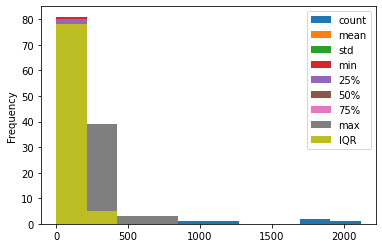

In [76]:
df_te.plot.hist()

In [77]:
# Vendo o mínimo de tempo de estadia por bairro

pd.options.display.max_rows = 82
datay.groupby('bairro', as_index=False)['tempo_estadia'].min().sort_values(by='tempo_estadia')

,bairro,tempo_estadia
0,Aclimação,1
33,Condado - Itaim Bibi,1
34,Consolação,1
35,Copacabana,1
37,Flamengo,1
...,...,...
7,Barra Funda,92
62,Mooca,122
39,Ilha do Leite,153
78,Vila Nova Conceição,302


In [78]:
# Vendo mediana de tempo de estadia por bairro

pd.options.display.max_rows = 82
datay.groupby('bairro', as_index=False)['tempo_estadia'].median().sort_values(by='tempo_estadia')

,bairro,tempo_estadia
19,Campo Belo,1.0
45,Jardim Canaa,1.0
81,Vila Romana,1.0
72,São Bento,1.0
5,Arouche,1.0
...,...,...
23,Centro (POA),250.0
39,Ilha do Leite,257.0
78,Vila Nova Conceição,302.0
7,Barra Funda,365.0


In [79]:
# Criando um dataframe apenas com linhas booked

df_bkd = datay[datay['status'] == "BOOKED"]
df_bkd

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
5,BOOKED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2819.95,18/11/2021,11,11,2021,2021,11,2021,11
7,BOOKED,False,wanderbezerra@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1672.00,18/11/2021,12,12,2021,2021,11,2021,276
8,BOOKED,True,rafaelakoury@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2022-03-20,2021-11-18,4443.65,18/11/2021,11,03,2021,2022,11,2021,120
10,BOOKED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
31,BOOKED,True,caioazeredo19@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-11-24,2021-12-24,2021-11-18,7822.23,18/11/2021,11,12,2021,2021,11,2021,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28490,BOOKED,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-01-06,2020-02-06,2020-05-28,207.50,28/05/2020,06,06,2020,2020,05,2020,31
28508,BOOKED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-12-29,2020-12-30,2020-05-23,250.00,23/05/2020,12,12,2020,2020,05,2020,1
28509,BOOKED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-12-14,2020-12-15,2020-05-23,250.00,23/05/2020,12,12,2020,2020,05,2020,1
28517,BOOKED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-12-20,2020-12-21,2020-05-23,250.00,23/05/2020,12,12,2020,2020,05,2020,1


In [80]:
# Criando um dataframe apenas com linhas booked_manually

df_mbkd = datay[datay['status'] == "BOOKED_MANUALLY"]

df_mbkd

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
81,BOOKED_MANUALLY,True,suportelojachique@gmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-22,2022-02-22,2021-11-17,2529.10,17/11/2021,11,02,2021,2022,11,2021,92
583,BOOKED_MANUALLY,False,marinamorete@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-13,2021-11-16,2021-11-11,581.40,11/11/2021,11,11,2021,2021,11,2021,3
992,BOOKED_MANUALLY,False,stuffhype756@gmail.com,São Paulo,Santa Cecília,Rua Das Palmeiras,1226010.0,2021-09-11,2021-11-18,2021-08-11,1290.00,08/11/2021,11,11,2021,2021,11,2021,68
1111,BOOKED_MANUALLY,True,contatoluis@gmail.com,São Paulo,Centro (SP),Conselheiro Furtado,1511000.0,2021-11-23,2022-02-23,2021-05-11,3095.26,05/11/2021,11,02,2021,2022,11,2021,92
1164,BOOKED_MANUALLY,True,m.vogt@de.krannich-solar.com,São Paulo,Vila Olímpia,Rua Gomes De Carvalho,4547004.0,2021-02-12,2022-02-01,2021-05-11,5130.00,05/11/2021,12,01,2021,2022,11,2021,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,BOOKED_MANUALLY,False,berg@slconfeccoes.com.br,NaN,NaN,NaN,NaN,2020-07-17,2020-08-31,2020-07-16,4394.27,16/07/2020,07,08,2020,2020,07,2020,45
28422,BOOKED_MANUALLY,False,tatiana.rodriguez@itixti.com.br,NaN,NaN,NaN,NaN,2020-06-28,2020-01-07,2020-06-23,720.00,23/06/2020,06,07,2020,2020,06,2020,173
28443,BOOKED_MANUALLY,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-06-22,2020-06-25,2020-06-18,648.00,18/06/2020,06,06,2020,2020,06,2020,3
28453,BOOKED_MANUALLY,False,lucassantinho4@gmail.com,NaN,NaN,NaN,NaN,2020-06-15,2020-06-19,2020-06-14,495.60,14/06/2020,06,06,2020,2020,06,2020,4


In [81]:
# Juntando as duas tabelas a fim de ter ambos os tipos de booked

bkd = pd.concat([df_bkd, df_mbkd], axis=0)
bkd

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
5,BOOKED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2819.95,18/11/2021,11,11,2021,2021,11,2021,11
7,BOOKED,False,wanderbezerra@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1672.00,18/11/2021,12,12,2021,2021,11,2021,276
8,BOOKED,True,rafaelakoury@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2022-03-20,2021-11-18,4443.65,18/11/2021,11,03,2021,2022,11,2021,120
10,BOOKED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
31,BOOKED,True,caioazeredo19@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-11-24,2021-12-24,2021-11-18,7822.23,18/11/2021,11,12,2021,2021,11,2021,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,BOOKED_MANUALLY,False,berg@slconfeccoes.com.br,NaN,NaN,NaN,NaN,2020-07-17,2020-08-31,2020-07-16,4394.27,16/07/2020,07,08,2020,2020,07,2020,45
28422,BOOKED_MANUALLY,False,tatiana.rodriguez@itixti.com.br,NaN,NaN,NaN,NaN,2020-06-28,2020-01-07,2020-06-23,720.00,23/06/2020,06,07,2020,2020,06,2020,173
28443,BOOKED_MANUALLY,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-06-22,2020-06-25,2020-06-18,648.00,18/06/2020,06,06,2020,2020,06,2020,3
28453,BOOKED_MANUALLY,False,lucassantinho4@gmail.com,NaN,NaN,NaN,NaN,2020-06-15,2020-06-19,2020-06-14,495.60,14/06/2020,06,06,2020,2020,06,2020,4


In [82]:
subs = bkd.groupby('isSubscription')
subs

In [83]:
# Separando os dados apenas com assinatura True

subs_true = subs.get_group(True)
subs_true

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8,BOOKED,True,rafaelakoury@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2022-03-20,2021-11-18,4443.65,18/11/2021,11,03,2021,2022,11,2021,120
10,BOOKED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
31,BOOKED,True,caioazeredo19@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-11-24,2021-12-24,2021-11-18,7822.23,18/11/2021,11,12,2021,2021,11,2021,30
43,BOOKED,True,hadassacampo16@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2022-11-01,2022-11-08,2021-11-18,2748.08,18/11/2021,01,08,2022,2022,11,2021,7
44,BOOKED,True,lucianaguimaf@gmail.com,São Paulo,Paraíso,Rua Apeninos,4104021.0,2021-11-22,2021-12-22,2021-11-17,3267.01,17/11/2021,11,12,2021,2021,11,2021,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071,BOOKED_MANUALLY,True,anafabri07@gmail.com,São Paulo,Santa Cecília,Rua Das Palmeiras,1226010.0,2021-08-21,2021-11-21,2021-06-08,3554.78,06/08/2021,08,11,2021,2021,08,2021,92
8144,BOOKED_MANUALLY,True,nicmattar@gmail.com,São Paulo,Cerqueira César,Bela Cintra,1415002.0,2021-07-09,2021-07-12,2021-05-08,2311.72,05/08/2021,09,12,2021,2021,08,2021,3
8231,BOOKED_MANUALLY,True,rossanacaetano@hotmail.com,São Paulo,Jardins,Rua Dr. Melo Alves,1417010.0,2021-05-08,2021-05-09,2021-04-08,4726.50,04/08/2021,08,09,2021,2021,08,2021,1
10224,BOOKED_MANUALLY,True,leandrookabe@hotmail.com,NaN,NaN,NaN,NaN,2021-07-17,2022-07-17,2021-06-28,3079.56,28/06/2021,07,07,2021,2022,06,2021,365


In [84]:
# Média de estadias para reservas bookadas por bairro com assinatura True

subs_true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
2,Barra Funda,365.000000
7,Brás,157.166667
27,Santana,120.333333
6,Brooklin,116.043478
26,Santa Cecília,111.937008
5,Bom Retiro,108.350000
29,Vila Olímpia,96.589286
13,Condado - Itaim Bibi,93.360000
14,Consolação,92.000000
20,Jardim Paulista,82.000000


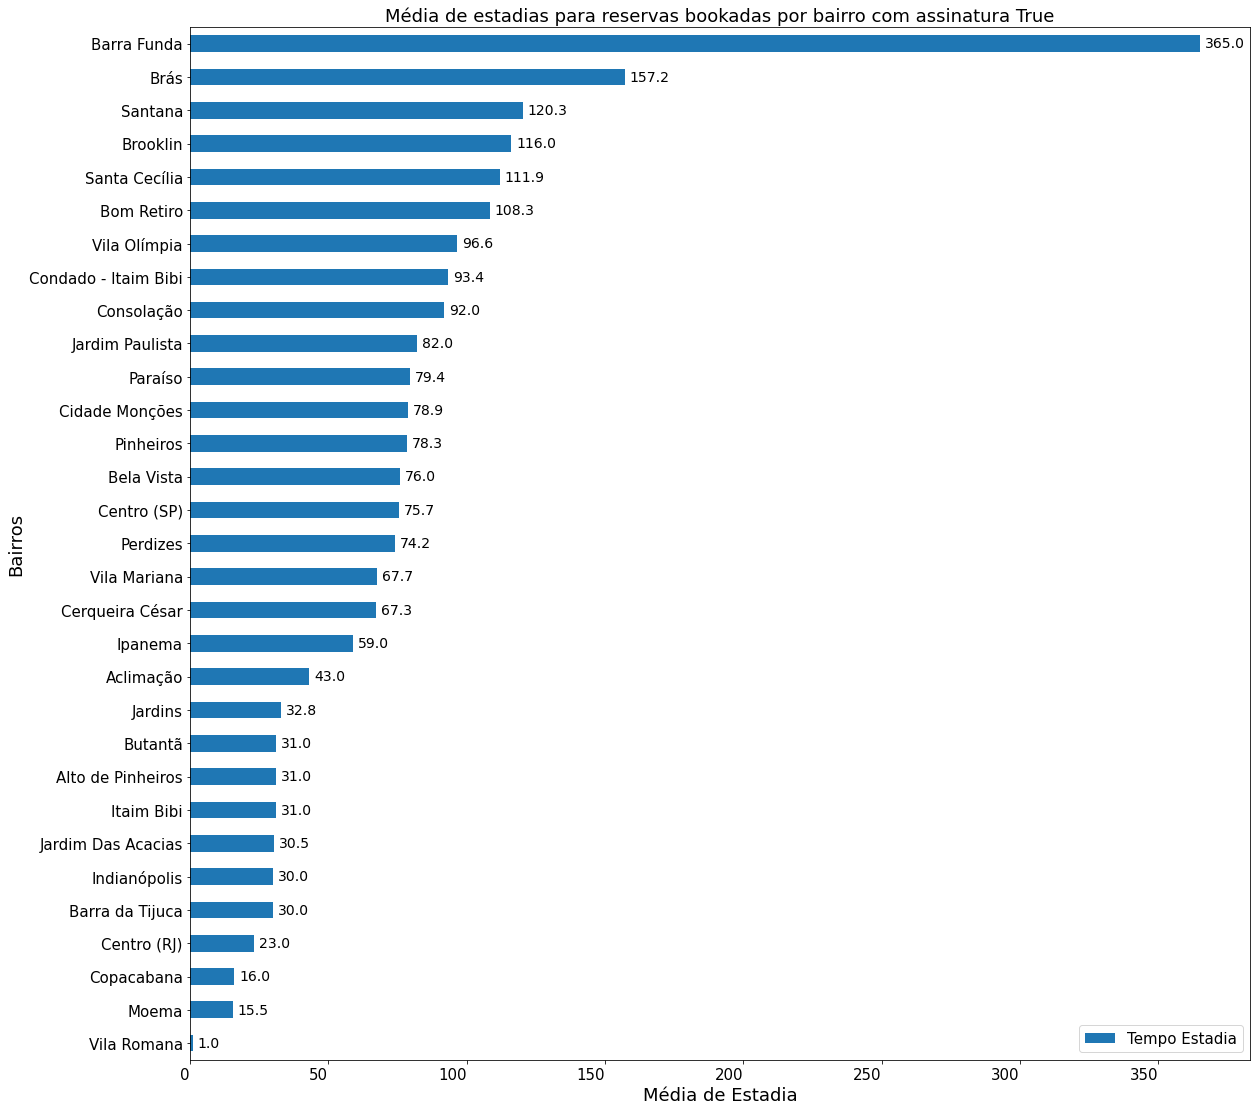

In [85]:
stb = subs_true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia')

ax = stb.plot.barh(x='bairro', y='tempo_estadia', figsize=(19,19), fontsize= 15, rot=0)
ax.set_xlabel('Média de Estadia', fontdict={'fontsize':18})
ax.set_ylabel('Bairros', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas bookadas por bairro com assinatura True', fontdict={'fontsize':18})
plt.legend(['Tempo Estadia'], loc='lower right', fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=15)


def h_valor_legenda(ax, spacing=5):
    
    '''Adiciona legenda ou rotulação ao final de cada barra'''
    
    # Estabelecendo os patches da figura
    rects = ax.patches        
    for rect in rects:
        # Obtendo os locais no gráfico de x e y usando rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        
        space = spacing
        
        # alinhamento vertical dos valores
        ha = 'left'

       
        # Tomando os valores de y como legenda e formatando os números para um decimal.
        label = "{:.1f}".format(x_value)

        # usando a função annotate()
        plt.annotate(
            label,                      # label é usado como legenda
            (x_value, y_value),         # legenda no final da barra
            xytext=(space, 0),          # mudando legenda horizontalmente por 'space'
            textcoords="offset points", # Interpreta o texto como pontos ao invés de pixels
            va='center',                # legenda centrada horizontalmente
            fontsize=14,                 # fonte do texto
            ha=ha)                      # alinhamento horizontal
                                        
        
h_valor_legenda(ax)




In [86]:
# Separando os dados apenas com assinatura False

subs_false = subs.get_group(False)
subs_false

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
5,BOOKED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2819.95,18/11/2021,11,11,2021,2021,11,2021,11
7,BOOKED,False,wanderbezerra@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1672.00,18/11/2021,12,12,2021,2021,11,2021,276
48,BOOKED,False,netolealcontato@gmail.com,São Paulo,Cerqueira César,Bela Cintra,1415002.0,2021-04-12,2021-06-12,2021-11-17,456.00,17/11/2021,12,12,2021,2021,11,2021,61
54,BOOKED,False,jaque_lopes@yahoo.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-12-17,2021-12-20,2021-11-17,612.00,17/11/2021,12,12,2021,2021,11,2021,3
59,BOOKED,False,paschoal_bianco@yahoo.com,São Paulo,Cerqueira César,Bela Cintra,1415002.0,2021-11-19,2021-11-21,2021-11-17,480.00,17/11/2021,11,11,2021,2021,11,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,BOOKED_MANUALLY,False,berg@slconfeccoes.com.br,NaN,NaN,NaN,NaN,2020-07-17,2020-08-31,2020-07-16,4394.27,16/07/2020,07,08,2020,2020,07,2020,45
28422,BOOKED_MANUALLY,False,tatiana.rodriguez@itixti.com.br,NaN,NaN,NaN,NaN,2020-06-28,2020-01-07,2020-06-23,720.00,23/06/2020,06,07,2020,2020,06,2020,173
28443,BOOKED_MANUALLY,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-06-22,2020-06-25,2020-06-18,648.00,18/06/2020,06,06,2020,2020,06,2020,3
28453,BOOKED_MANUALLY,False,lucassantinho4@gmail.com,NaN,NaN,NaN,NaN,2020-06-15,2020-06-19,2020-06-14,495.60,14/06/2020,06,06,2020,2020,06,2020,4


In [87]:
# Média de estadias para reservas bookadas por bairro com assinatura False

subs_false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
27,Vila Madalena,229.000000
8,Chácara Santo Antônio (Zona Sul),154.000000
9,Cidade Monções,122.000000
11,Consolação,109.400000
28,Vila Mariana,99.050000
18,Jardins,94.666667
22,Perdizes,91.750000
1,Bela Vista,80.192308
15,Ipanema,78.125000
29,Vila Olímpia,77.410256


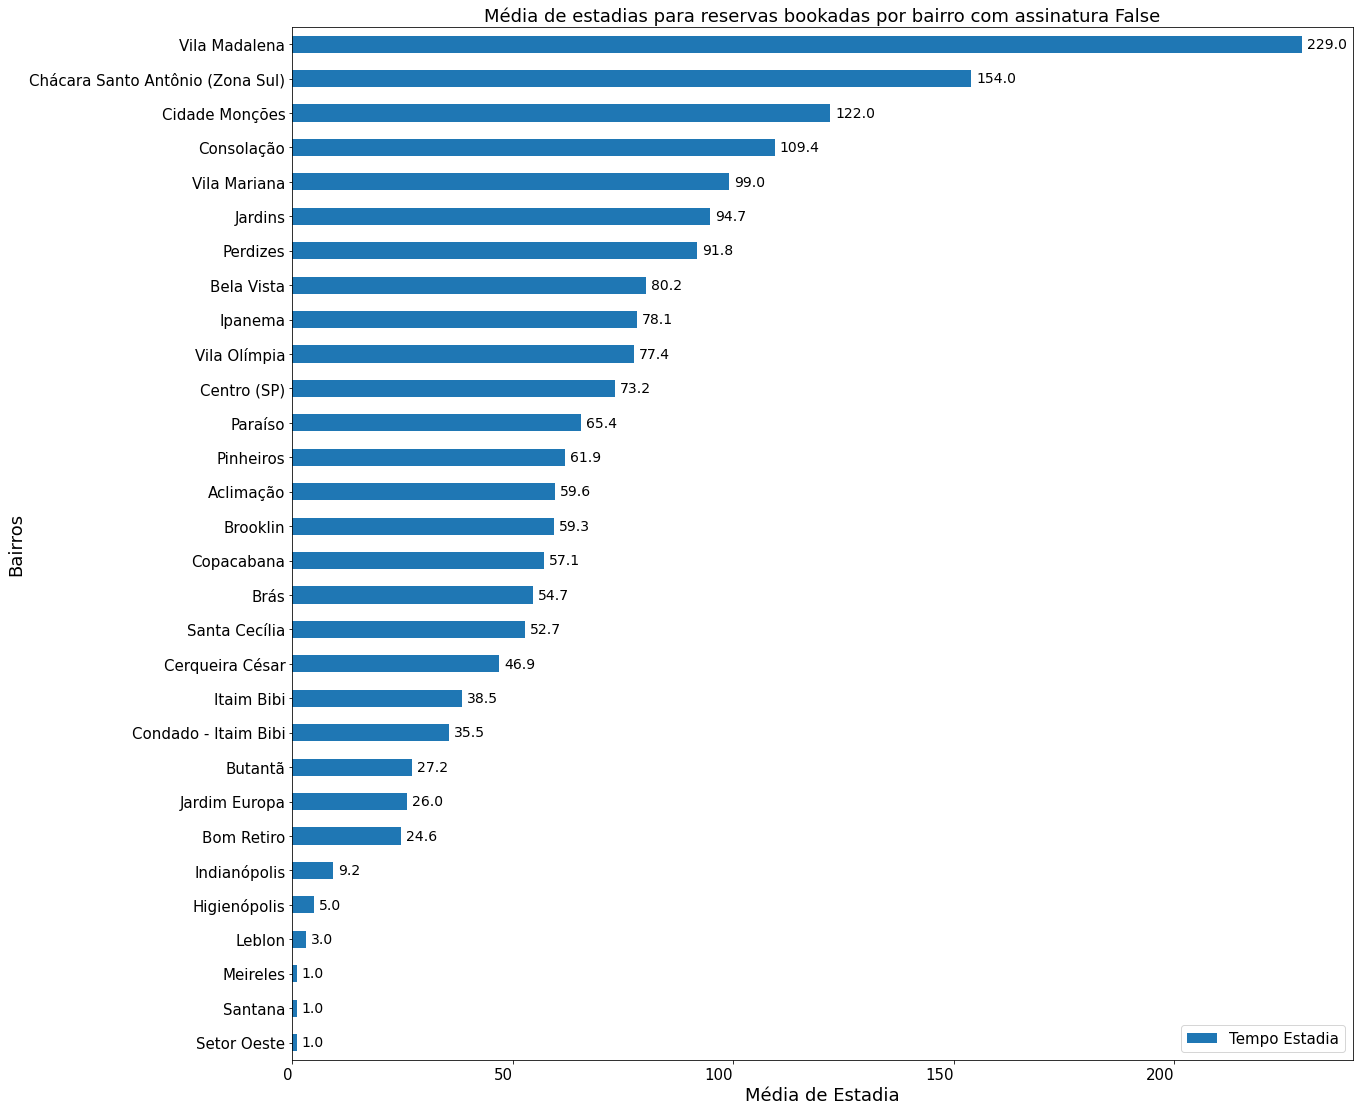

In [97]:
sfb = subs_false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia')

ax = sfb.plot.barh(x='bairro', y='tempo_estadia', figsize=(19,19), fontsize=15, rot=0)
ax.set_xlabel('Média de Estadia', fontdict={'fontsize':18})
ax.set_ylabel('Bairros', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas bookadas por bairro com assinatura False', fontdict={'fontsize':18})
plt.legend(['Tempo Estadia'], loc='lower right', fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=15)

h_valor_legenda(ax)


In [89]:
# Criando um dataframe apenas com linhas expired

df_xpr = datay[datay['status'] == "EXPIRED"]
df_xpr

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,2021-11-18,754.47,18/11/2021,11,12,2021,2021,11,2021,290
6,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2968.37,18/11/2021,11,11,2021,2021,11,2021,11
9,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2793.00,18/11/2021,11,11,2021,2021,11,2021,11
11,EXPIRED,False,alicecabral_@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1760.00,18/11/2021,12,12,2021,2021,11,2021,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17928,EXPIRED,False,fefanta@gmail.com,NaN,NaN,NaN,NaN,2021-01-18,2021-01-23,2020-12-17,1348.50,17/12/2020,01,01,2021,2021,12,2020,5
18024,EXPIRED,False,mtkaiesec@gmail.com,NaN,NaN,NaN,NaN,2021-03-02,2021-04-02,2020-12-15,231.38,15/12/2020,02,02,2021,2021,12,2020,31
18104,EXPIRED,False,fernandamenin093@gmail.com,NaN,NaN,NaN,NaN,2020-12-23,2021-08-01,2020-12-14,2277.15,14/12/2020,12,01,2020,2021,12,2020,221
18133,EXPIRED,False,nathaliahpff100@gmail.com,NaN,NaN,NaN,NaN,2021-01-26,2021-01-29,2020-12-14,466.14,14/12/2020,01,01,2021,2021,12,2020,3


In [90]:
# Agrupando as assinaturas para a tabela de status expired

subs_ = df_xpr.groupby('isSubscription')
subs_

In [91]:
# Separando os dados apenas com assinatura True

subs__true = subs_.get_group(True)
subs__true

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
16,EXPIRED,True,lilianmonteiro007@gmail.com,São Paulo,Centro (SP),Avenida Senador Queirós,1026001.0,2021-03-12,2022-03-12,2021-11-18,2153.65,18/11/2021,12,12,2021,2022,11,2021,365
18,EXPIRED,True,lilianmonteiro007@gmail.com,São Paulo,Centro (SP),Avenida Senador Queirós,1026001.0,2021-07-12,2022-07-12,2021-11-18,2239.60,18/11/2021,12,12,2021,2022,11,2021,365
26,EXPIRED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
27,EXPIRED,True,saraivanatalia95@gmail.com,São Paulo,Bela Vista,Rua Francisaca Miquelina,1316000.0,2022-01-15,2022-12-15,2021-11-18,2943.33,18/11/2021,01,12,2022,2022,11,2021,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17839,EXPIRED,True,gustavomazzilli@gmail.com,São Paulo,Bela Vista,NaN,NaN,2021-01-14,2021-03-14,2020-12-19,10195.97,19/12/2020,01,03,2021,2021,12,2020,59
17841,EXPIRED,True,b.henriques@outlook.com,NaN,NaN,NaN,NaN,2020-12-27,2021-03-27,2020-12-18,3331.78,18/12/2020,12,03,2020,2021,12,2020,90
17847,EXPIRED,True,rejane_23@icloud.com,NaN,NaN,NaN,NaN,2020-12-22,2021-06-22,2020-12-18,5830.69,18/12/2020,12,06,2020,2021,12,2020,182
17848,EXPIRED,True,rejane_23@icloud.com,São Paulo,Santa Cecília,NaN,NaN,2020-12-22,2021-06-22,2020-12-18,3645.12,18/12/2020,12,06,2020,2021,12,2020,182


In [92]:
# Média de estadias para reservas expiradas por bairro com assinatura True

subs__true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
19,Centro (GRU),365.000000
65,Água Verde,359.000000
17,Centro (CTBA),359.000000
42,Jardim dos Ipes,355.000000
5,Barra Funda,303.333333
34,Ilha do Leite,257.000000
20,Centro (POA),215.250000
41,Jardim das Acacias,201.750000
37,Itaim Bibi,162.366667
49,Mooca,161.666667


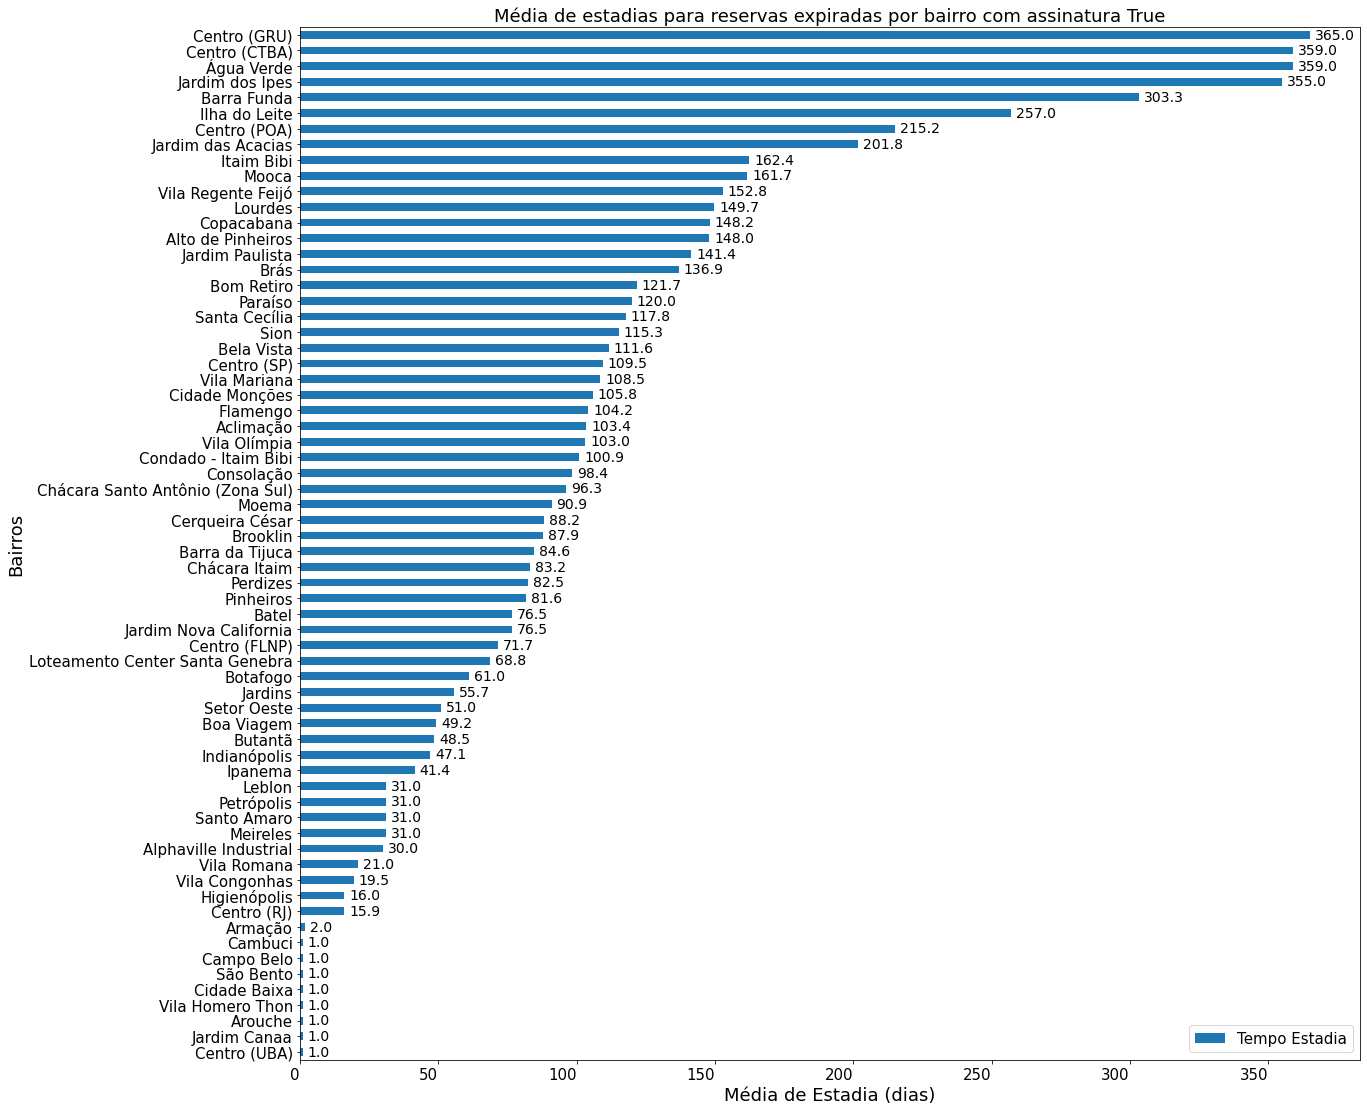

In [93]:
stx = subs__true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia')

ax = stx.plot.barh(x='bairro', y='tempo_estadia', figsize=(19,19), fontsize=15, rot=0)
ax.set_xlabel('Média de Estadia (dias)', fontdict={'fontsize':18})
ax.set_ylabel('Bairros', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas expiradas por bairro com assinatura True', fontdict={'fontsize':18})
plt.legend(['Tempo Estadia'], loc='lower right', fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=15)


h_valor_legenda(ax)

In [94]:
# Separando os dados apenas com assinatura False

subs__false = subs_.get_group(False)
subs__false

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,2021-11-18,754.47,18/11/2021,11,12,2021,2021,11,2021,290
6,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2968.37,18/11/2021,11,11,2021,2021,11,2021,11
9,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2793.00,18/11/2021,11,11,2021,2021,11,2021,11
11,EXPIRED,False,alicecabral_@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1760.00,18/11/2021,12,12,2021,2021,11,2021,276
12,EXPIRED,False,wanderbezerra@gmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-03-12,2021-12-13,2021-11-18,1760.00,18/11/2021,12,12,2021,2021,11,2021,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17928,EXPIRED,False,fefanta@gmail.com,NaN,NaN,NaN,NaN,2021-01-18,2021-01-23,2020-12-17,1348.50,17/12/2020,01,01,2021,2021,12,2020,5
18024,EXPIRED,False,mtkaiesec@gmail.com,NaN,NaN,NaN,NaN,2021-03-02,2021-04-02,2020-12-15,231.38,15/12/2020,02,02,2021,2021,12,2020,31
18104,EXPIRED,False,fernandamenin093@gmail.com,NaN,NaN,NaN,NaN,2020-12-23,2021-08-01,2020-12-14,2277.15,14/12/2020,12,01,2020,2021,12,2020,221
18133,EXPIRED,False,nathaliahpff100@gmail.com,NaN,NaN,NaN,NaN,2021-01-26,2021-01-29,2020-12-14,466.14,14/12/2020,01,01,2021,2021,12,2020,3


In [95]:
# Média de estadias para reservas expiradas por bairro com assinatura False

subs__false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
59,Vila Nova Conceição,302.000000
17,Centro (UBA),171.000000
3,Auxiliadora,140.000000
46,Manaíra,92.000000
36,Jardim Paulista,87.181818
52,Santa Cecília,86.800000
25,Copacabana,85.666667
57,Vila Madalena,82.222222
39,Jardins,82.125000
0,Aclimação,80.052632


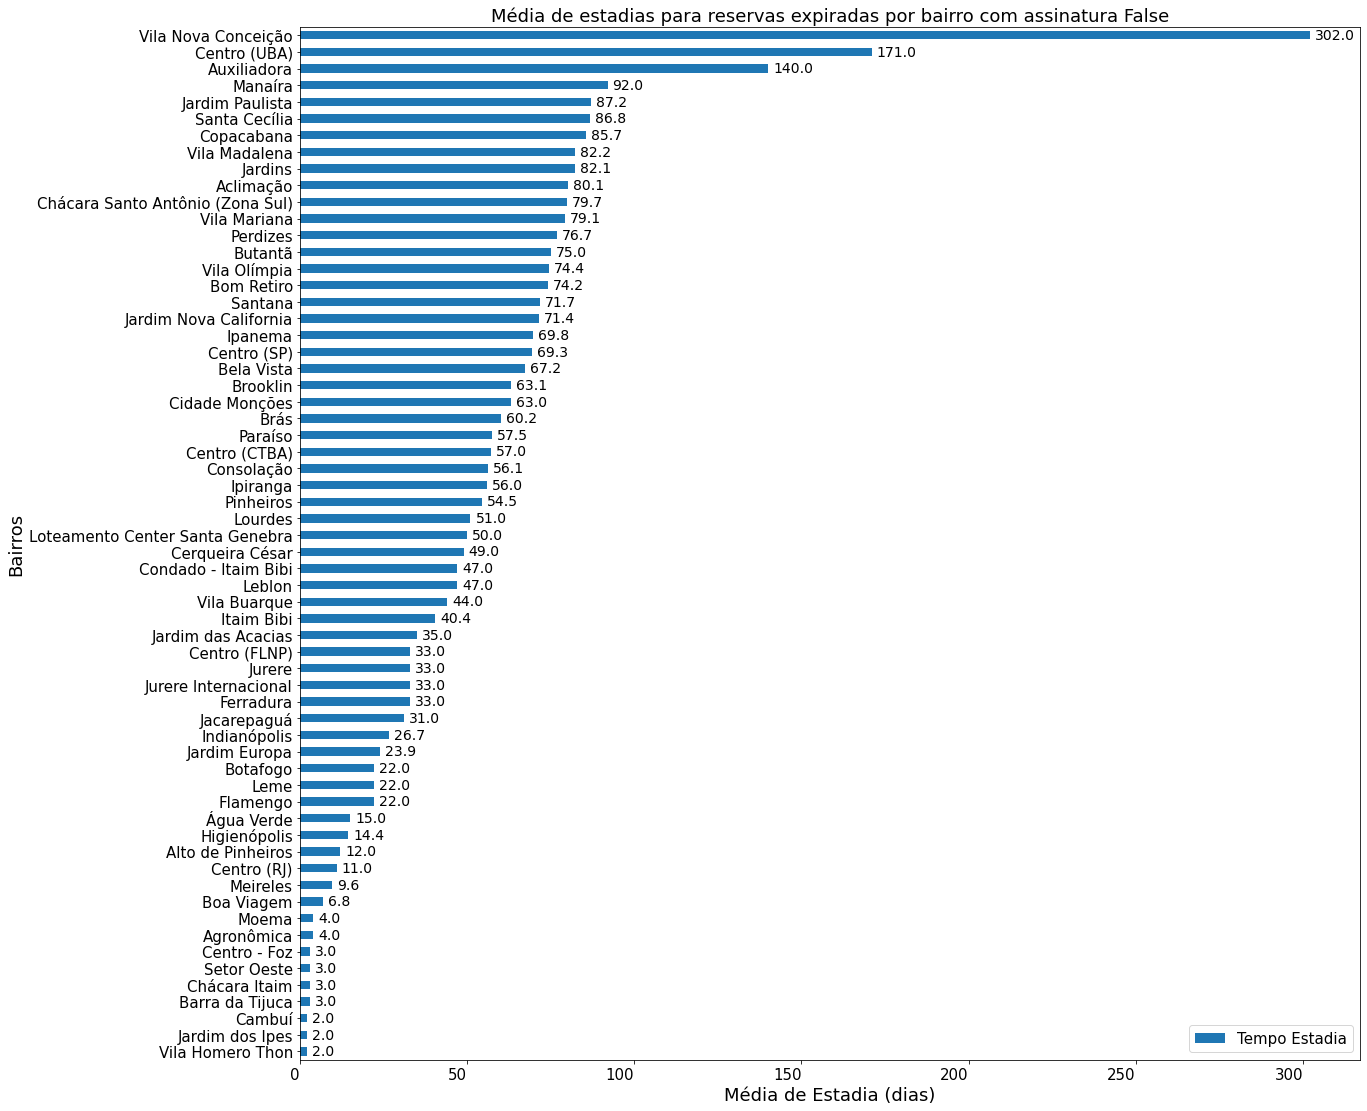

In [96]:
sfx = subs__false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia')

ax = sfx.plot.barh(x='bairro', y='tempo_estadia', figsize=(19,19), fontsize=15, rot=0)
ax.set_xlabel('Média de Estadia (dias)', fontdict={'fontsize':18})
ax.set_ylabel('Bairros', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas expiradas por bairro com assinatura False', fontdict={'fontsize':18})
plt.legend(['Tempo Estadia'], loc='lower right', fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right', fontsize=15)

h_valor_legenda(ax)

In [194]:
#data_subset = data.loc[:, ['email', 'status', 'status_2', 'status_1', 'mes_status_2', 'ano_status_2', 'mes_status_1', 'ano_status_1']]
#sub_status = data_subset.groupby('status')
#display(sub_status)

In [25]:
#sub_status.groups

In [26]:
#data[['status', 'email', 'status_2', 'status_1']].groupby(['status', 'email']).count()

In [27]:
#data.groupby(['mes_status_2', 'status', 'email']).mes_status_2.agg('size')

In [28]:
#data.groupby(['mes_status_1', 'status', 'email']).mes_status_1.agg('size')

In [29]:
#data1 = data.copy()

In [30]:
#data1 = pd.get_dummies(data, columns=['status', 'status_2', 'status_1'])
#data1.head()

In [31]:
#df['createdAt'] = pd.to_datetime(df['createdAt'], format= '%d/%m/%Y')

In [32]:
#df[['createdAt']].info()

In [33]:
#df['updatedAt'] = pd.to_datetime(df['updatedAt'], format= '%d/%m/%Y')
#df['data_checkin'] = pd.to_datetime(df['data_checkin'], format= '%d/%m/%Y')
#df['data_checkout'] = pd.to_datetime(df['data_checkout'], format= '%d/%m/%Y')
#df['data_status_1'] = pd.to_datetime(df['data_status_1'], format= '%d/%m/%Y')
#df['data_status_2'] = pd.to_datetime(df['data_status_2'], format= '%d/%m/%Y')

In [34]:
#df.info(verbose=True)

In [35]:
#df.groupby(['email', 'status'])['status'].count()
#df.groupby('status', as_index=False)["email"].count()

In [36]:
#status_ = df.groupby("status")

In [37]:
#pd.options.display.max_columns = 103
#status_.get_group('EXPIRED')